In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [8]:
try:
    df = pd.read_csv("gold_prices.csv", sep=",")  # coba juga sep="\t" jika tab-delimited
    print(df.head())

except FileNotFoundError:
    print("file not found")

         Date     Price      Open      High       Low    Vol.  Change %
0  11/22/2024  2,699.70  2,671.20  2,701.60  2,670.85  186.30      0.93
1  11/21/2024  2,674.90  2,653.50  2,676.50  2,651.60  186.30      0.87
2  11/20/2024  2,651.70  2,635.80  2,659.00  2,621.90  182.01      0.79
3  11/19/2024  2,631.00  2,616.30  2,643.40  2,614.20  202.24      0.63
4  11/18/2024  2,614.60  2,571.50  2,619.50  2,568.50  195.29      1.73


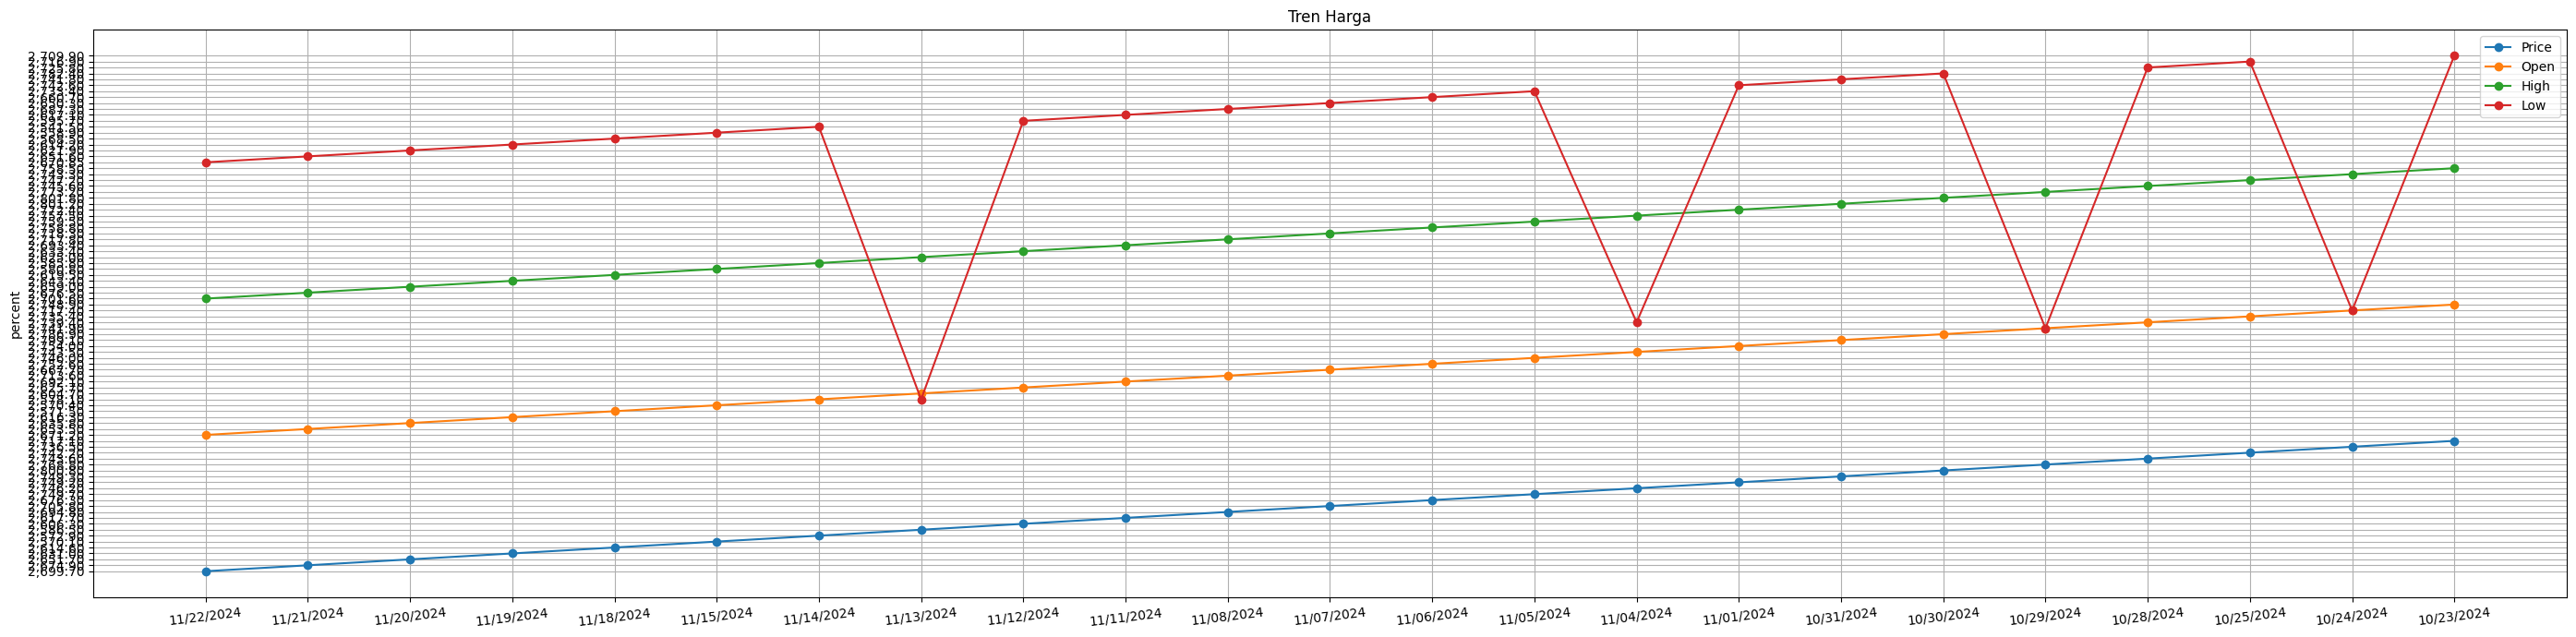

In [9]:
plt.figure(figsize=(28,7))

columns_to_plot = ['Price', 'Open', 'High', 'Low']

for col in columns_to_plot:
    plt.plot(df['Date'], df[col], marker='o', label=col)

plt.title("Tren Harga")
plt.ylabel("percent")
plt.legend()
plt.grid(True)
plt.xticks(rotation=7)
plt.tight_layout()
plt.show()


In [4]:
df["High"] = df["High"].str.replace(",", "")

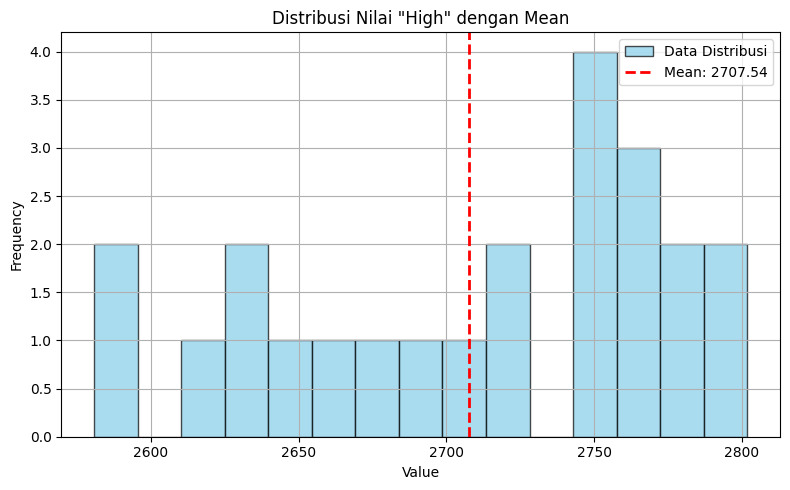

In [12]:
# Hapus koma dari angka dan konversi ke numerik
df["High"] = df["High"].str.replace(",", "", regex=False)
df["High"] = pd.to_numeric(df["High"], errors="coerce")

# Hitung mean setelah konversi
mean_value = np.mean(df["High"])

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(df["High"], bins=15, color='skyblue', edgecolor='black', alpha=0.7, label="Data Distribusi")

# Tambahkan garis mean
plt.axvline(mean_value, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_value:.2f}')

# Tambahan format plot
plt.title('Distribusi Nilai "High" dengan Mean')
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


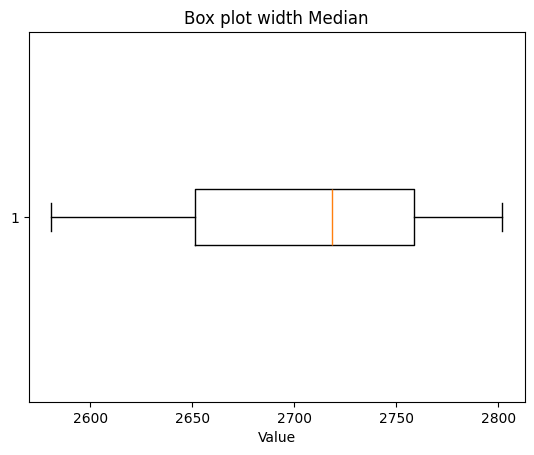

In [13]:
plt.boxplot(df["High"], vert=False)
plt.title("Box plot width Median")
plt.xlabel("Value")
plt.show()

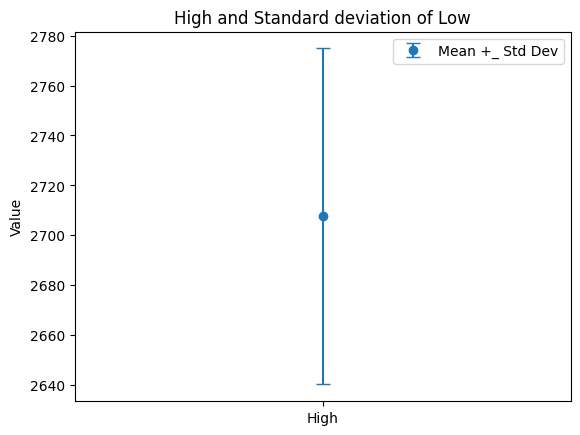

In [14]:
mean_low = df['High'].mean()
std_low = df['High'].std()
plt.errorbar(['High'], [mean_low], yerr=[std_low], fmt='o', capsize=5, label='Mean +_ Std Dev')

plt.title('High and Standard deviation of Low')
plt.ylabel('Value')
plt.legend()

plt.show()

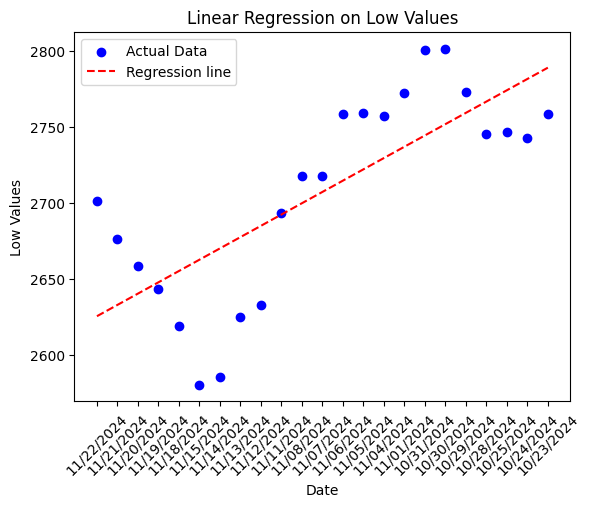

In [15]:
X = np.arange(len(df)).reshape(-1,1)
y = df['High'].values
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
plt.scatter(df['Date'], y, label='Actual Data', color='blue', marker='o')

plt.plot(df['Date'], y_pred, label='Regression line', color='red', linestyle='--')

plt.title('Linear Regression on Low Values')
plt.xlabel('Date')
plt.ylabel('Low Values')
plt.legend()

plt.xticks(rotation=45)

plt.show()